In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [2]:
class ButterWorthFilter:

    def __init__(self, df, name: str, time_columns='Timestamp', ppg_columns='IR_Value'):
        self.df = df
        self.name = name

        self.timestamp_scaling()
        self.t = self.df[time_columns].values
        self.ppg = self.df[ppg_columns].values

        self.coef_a = None
        self.coef_b = None

        self.order = 2 
        self.cutoff = 3.0
        self.fs = 1 / (self.t[1]- self.t[0])
        self.filtered_signal = None

    def timestamp_scaling(self, columns='Timestamp'):
        self.df[columns] = self.df[columns] / 1000
    
    def butter_lowpass_coefficient(self):
        nyquist = 0.5 * self.fs
        normal_cutoff = self.cutoff / nyquist
        self.coef_b, self.coef_a = butter(self.order, normal_cutoff, btype='low', analog=False)
        
        return self.coef_b, self.coef_a

    def butter_lowpass_filter(self):
        self.butter_lowpass_coefficient()
        self.filtered_signal = lfilter(self.coef_b, self.coef_a, self.ppg)

        return self.filtered_signal


    def plot(self, zoom: bool=False, lower_zoom: int=5, upper_zoom: int=20): 
        plt.figure(figsize=(10, 6))
        plt.plot(self.t, self.ppg, label='Original Signal (PPG)', color='blue', alpha=0.6, linewidth=3)
        plt.plot(self.t, self.filtered_signal, label='Filtered Signal (Smoothing)', color='red', linewidth=1)
        
        if zoom:
            plt.xlim(lower_zoom,upper_zoom)

        plt.title(f'Low-Pass Butterworth Filter on PPG Signal {self.name}')
        plt.xlabel('Waktu (detik)')
        plt.ylabel('Amplitudo')

        plt.legend()
        plt.grid()
        plt.show()

### Dataset 1

In [3]:
df_1 = pd.read_csv('ppg_raw_data/raw_ppg_1.csv', sep=',', usecols=[1,2])
df_1.tail()

,Timestamp,IR_Value
579,70011,110246.0
580,70133,110316.0
581,70254,109304.0
582,70373,109880.0
583,70495,109809.0


In [4]:
dataset_1 = ButterWorthFilter(df=df_1, name='Data 1')

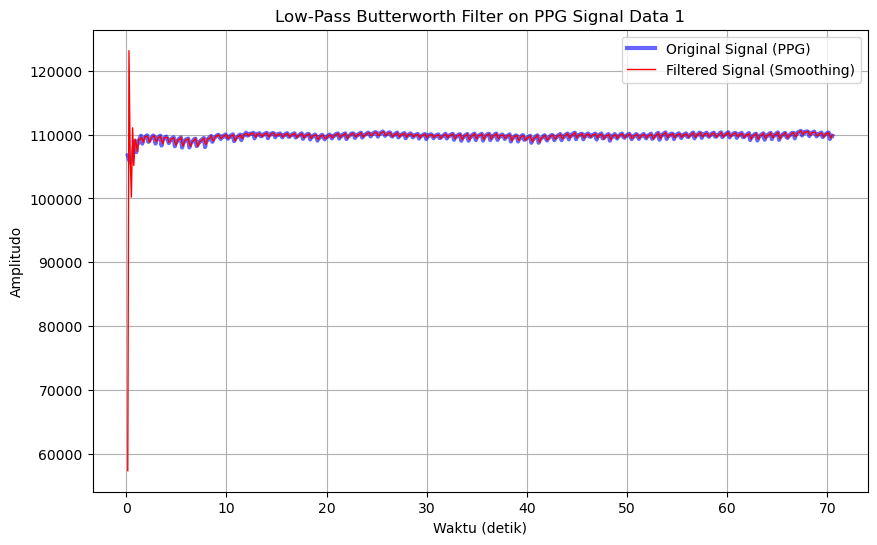

In [5]:
dataset_1.butter_lowpass_filter()
dataset_1.plot()

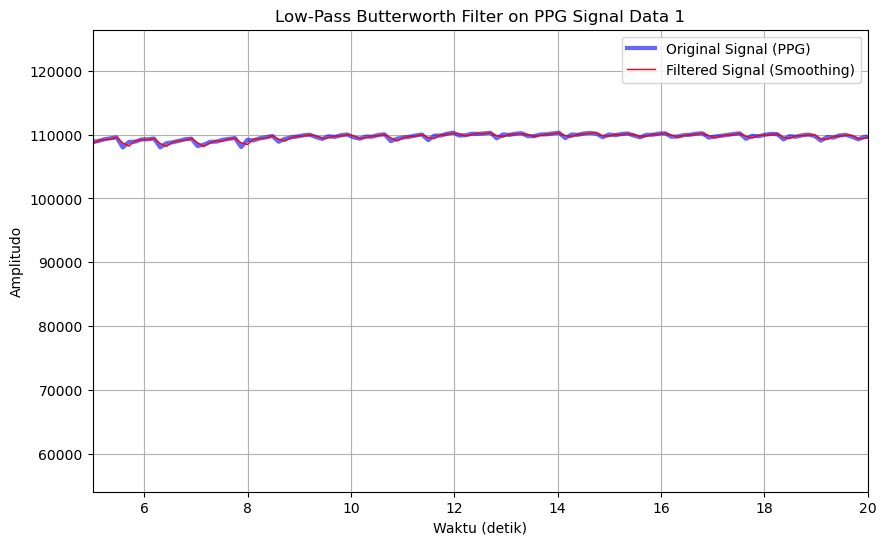

In [6]:
dataset_1.plot(zoom=True)

In [7]:
print(f"Data 1 Koefisien A : {dataset_1.coef_a}")
print(f"Data 1 Koefisien B : {dataset_1.coef_b}")

Data 1 Koefisien A : [1.         0.84860766 0.3018775 ]
Data 1 Koefisien B : [0.53762129 1.07524258 0.53762129]


### Dataset 2

In [8]:
df_2 = pd.read_csv('ppg_raw_data/raw_ppg_2.csv', sep=',', usecols=[1,2])
df_2.tail()

,Timestamp,IR_Value
579,70021,105550.0
580,70141,109944.0
581,70261,105573.0
582,70382,103015.0
583,70503,99883.0


In [9]:
dataset_2 = ButterWorthFilter(df=df_2, name='Data 2')

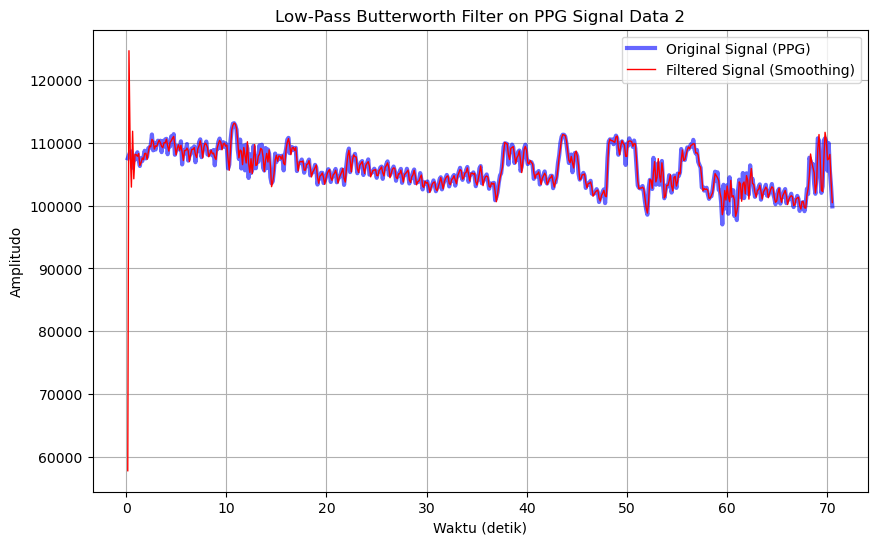

In [10]:
dataset_2.butter_lowpass_filter()
dataset_2.plot()

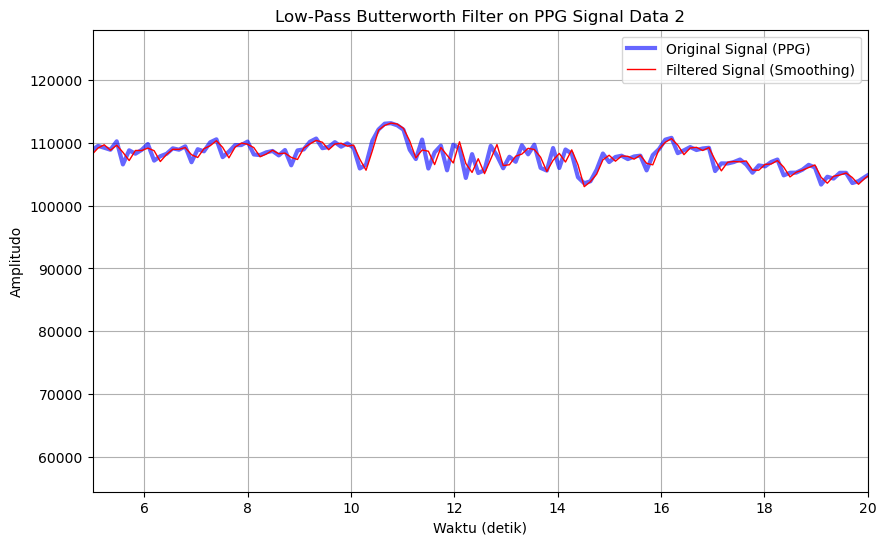

In [11]:
dataset_2.plot(zoom=True)

In [12]:
print(f"Data 2 Koefisien A : {dataset_2.coef_a}")
print(f"Data 2 Koefisien B : {dataset_2.coef_b}")

Data 2 Koefisien A : [1.         0.84860766 0.3018775 ]
Data 2 Koefisien B : [0.53762129 1.07524258 0.53762129]
